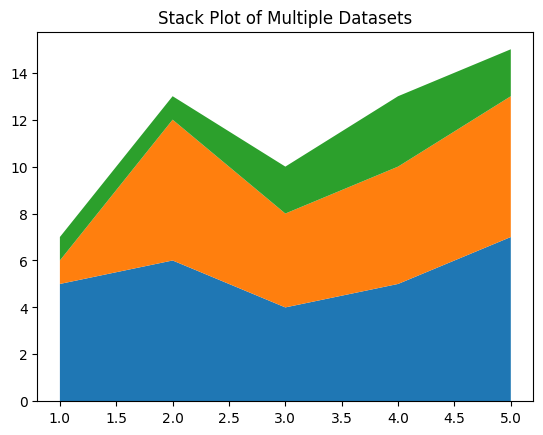

In [1]:
# Import the necessary library
import matplotlib.pyplot as plt

# Define x-axis values
x = [1, 2, 3, 4, 5]

# Define y-axis values for three datasets
y1 = [5, 6, 4, 5, 7]
y2 = [1, 6, 4, 5, 6]
y3 = [1, 1, 2, 3, 2]

# Create a subplot for a stackplot
fig, ax = plt.subplots()

# Plot a stackplot with three datasets
ax.stackplot(x, y1, y2, y3)

# Set a title for the stack plot
ax.set_title('Stack Plot of Multiple Datasets')

# Display the stackplot
plt.show()


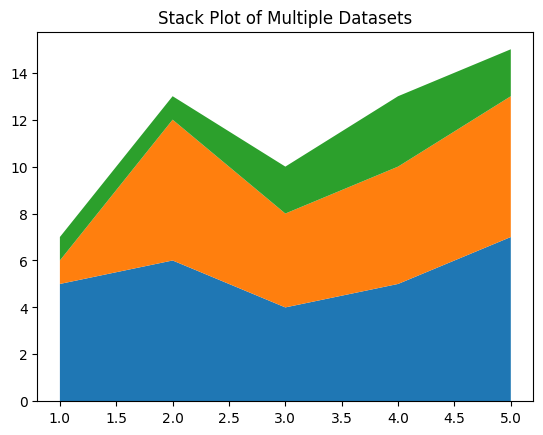

In [2]:
# Define x-axis values
x = [1, 2, 3, 4, 5]

# Define y-axis values as a dictionary
y_values = {
    'y1': [5, 6, 4, 5, 7],
    'y2': [1, 6, 4, 5, 6],
    'y3': [1, 1, 2, 3, 2],
}

# Create a subplot for a stackplot
fig, ax = plt.subplots()

# Plot a stackplot with multiple datasets using the values from the dictionary
ax.stackplot(x, y_values.values(), labels=y_values.keys())

# Set a title for the stack plot
ax.set_title('Stack Plot of Multiple Datasets')

# Display the stackplot
plt.show()


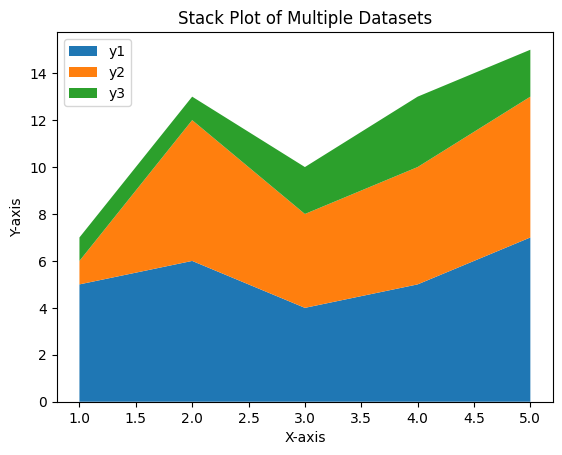

In [3]:
# Define x-axis values
x = [1, 2, 3, 4, 5]

# Define y-axis values as a dictionary
y_values = {
    'y1': [5, 6, 4, 5, 7],
    'y2': [1, 6, 4, 5, 6],
    'y3': [1, 1, 2, 3, 2],
}

# Create a subplot for a stackplot
fig, ax = plt.subplots()

# Plot a stackplot with multiple datasets using the values from the dictionary
ax.stackplot(x, y_values.values(), labels=y_values.keys())

# Add legend with specified location for better interpretation
ax.legend(loc='upper left')

# Add x and y labels for better readability
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set a title for the stack plot
ax.set_title('Stack Plot of Multiple Datasets')

# Display the stackplot
plt.show()

### Plotting a Stack Plot from the CSV File 

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('cumulative-covid-vaccinations.csv')

# Display the DataFrame to inspect the data
df.head()

,Entity,Code,Day,total_vaccinations
0,Afghanistan,AFG,2021-02-22,0
1,Afghanistan,AFG,2021-02-28,8200
2,Afghanistan,AFG,2021-03-16,54000
3,Afghanistan,AFG,2021-04-07,120000
4,Afghanistan,AFG,2021-04-22,240000


In [5]:
# Filter the DataFrame to include only rows with specified entities
df = df[df['Entity'].isin(['World', 'North America', 'Europe'])]

# Group the DataFrame by 'Entity' and aggregate 'total_vaccinations' as lists
countries_vaccinations = df.groupby('Entity')['total_vaccinations'].apply(list)

# Print the resulting grouped data
print(countries_vaccinations)

Entity
Europe           [0, 0, 1, 1, 1, 2, 8, 10, 11, 16, 17, 17, 17, ...
North America    [39224, 43977, 92351, 254340, 533039, 956823, ...
World            [0, 0, 1, 1, 1, 2, 8, 10, 11, 16, 17, 39241, 4...
Name: total_vaccinations, dtype: object


In [6]:
# Convert the grouped Pandas Series 'countries_vaccinations' to a dictionary
cv_dict = countries_vaccinations.to_dict()

In [7]:
# Find the key-value pair with the maximum length of the list in the dictionary
max_key, max_value = max(cv_dict.items(), key=lambda x: len(set(x[1])))

# Create an empty dictionary
cv_dict_full = {}

for k, v in cv_dict.items():
    if len(v) < len(max_value):
        trailing_zeros = [0] * (len(max_value) - len(v))
        cv_dict_full[k] = trailing_zeros + v
    else:
        cv_dict_full[k] = v

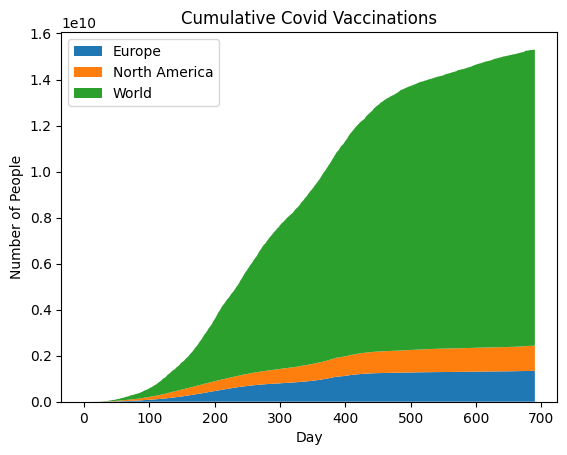

In [8]:
# Generate an array of dates from 0 to the length of the maximum list
dates = np.arange(0, len(max_value))

# Create a subplot for a stack plot
fig, ax = plt.subplots()

# Plot a stack plot with values from the fully padded dictionary
ax.stackplot(dates, cv_dict_full.values(), labels=cv_dict_full.keys())

# Add a legend for better interpretation
ax.legend(loc='upper left', ncol=1)

# Set the title of the plot
ax.set_title('Cumulative Covid Vaccinations')

# Set x and y-axis labels for better readability
ax.set_xlabel('Day')
ax.set_ylabel('Number of People')

# Display the stack plot
plt.show()
